<a href="https://colab.research.google.com/github/pooja1006/hello-world/blob/master/FaceMask_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:

!pip install kaggle

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poojasoni10","key":"830e6922c9c0f3d46177894c2c1dacf9"}'}

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d poojasoni10/face-dataset

 65% 33.0M/50.4M [00:02<00:01, 17.5MB/s]
100% 50.4M/50.4M [00:02<00:00, 24.9MB/s]


In [14]:
from zipfile import ZipFile
file_name = "face-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [45]:
import tensorflow as tf
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [17]:
img_array = cv2.imread("/content/Datasets/with_mask/0-with-mask.jpg")

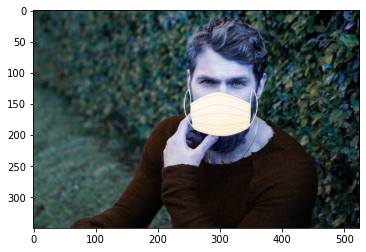

In [18]:
plt.imshow(img_array)

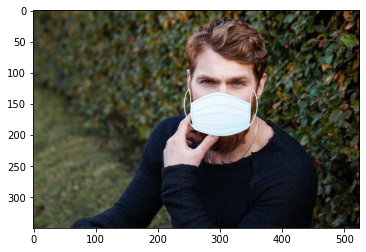

In [19]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [20]:
img_array.shape

(350, 525, 3)

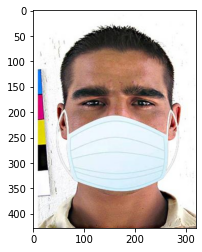

In [21]:
Datadirectory = "/content/Datasets"
Classes = ["with_mask","without_mask"]
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

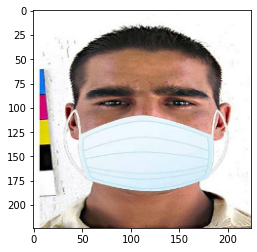

In [22]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
train_Data = []
def create_train_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                train_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [25]:
create_train_Data()

In [27]:
print(len(train_Data))

1376


In [28]:
import random 
random.shuffle(train_Data)

In [29]:
x =[]
y =[]
for features,label in train_Data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1, img_size, img_size,3)

In [30]:
x.shape

(1376, 224, 224, 3)

In [31]:
x= x/255.0;

In [32]:
y[0]

1

In [33]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [46]:
from tensorflow.keras import layers

In [47]:
model = tf.keras.applications.mobilenet.MobileNet()

In [48]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

**Transfer** **learning**

In [49]:
base_input = model.layers[0].input

In [50]:
base_output = model.layers[-4].output

In [51]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [52]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [53]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

Binary classification (Face Mask / without face mask

In [54]:
new_model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [55]:
new_model.fit(x,y, epochs = 1, validation_split= 0.1)

ValueError: ignored